In [ ]:
import keras
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models

In [ ]:
tf.keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,) # x remains as it is(as -1 is provided), y changes
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"] #All labeles are stored here.

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

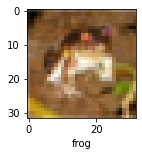

In [ ]:
plot_sample(x_train, y_train, 0) #As 0th index value of y_train is 6 i.e FroG

In [ ]:
plot_sample(x_train, y_train, 1) #1st,2nd index of y_train are 9 i.e Truck

In [ ]:
plot_sample(x_train, y_train, 3)

In [ ]:
x_train[0] #RGB values are stored from range 0-255

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


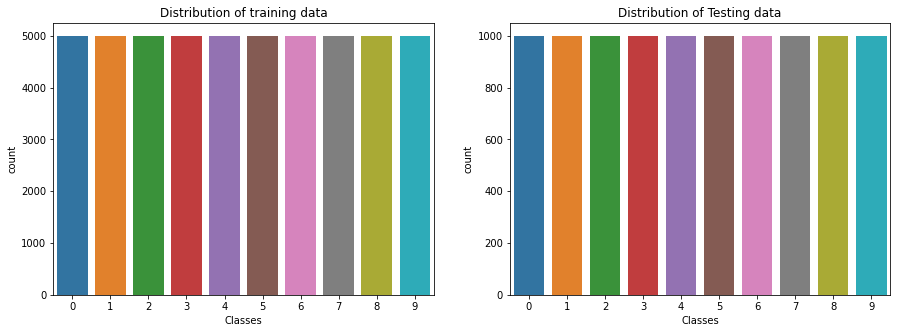

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [ ]:
# Normalize the data

x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
# One Hot Reprtesentation of labels

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), #1st layer, accepts shape of 32*32*3
        layers.Dense(3000, activation='relu'),  #Deep layers with 3000 nurons
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')  #last layer with 10 categories, as we have to predict 10 categories  
    ])



In [ ]:
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy', #we have values like(0-9)in y 
              metrics=['accuracy'])

In [ ]:
num_epochs = 6
history = ann.fit(x_train,y_train,epochs=num_epochs, batch_size=5, validation_split=0.2, verbose=0)
history_dict = history.history

In [ ]:
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8125 - accuracy: 0.3554
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6252 - accuracy: 0.4256
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5433 - accuracy: 0.4552
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4850 - accuracy: 0.4759
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4337 - accuracy: 0.4955


You can see that at the end of 5 epochs, accuracy is at around 49%

Text(0.5, 0, 'Epochs')

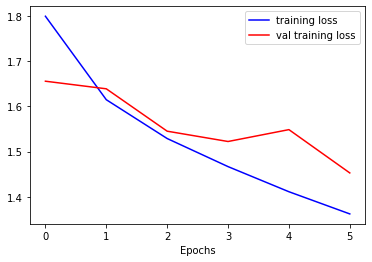

In [ ]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

Text(0.5, 0, 'Epochs')

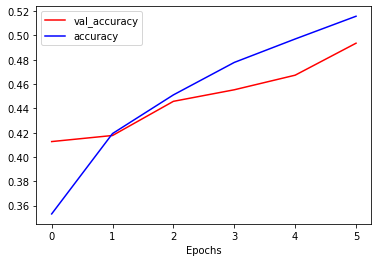

In [ ]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.50      0.56      1000
           1       0.63      0.57      0.60      1000
           2       0.49      0.21      0.30      1000
           3       0.37      0.18      0.24      1000
           4       0.41      0.47      0.44      1000
           5       0.42      0.38      0.40      1000
           6       0.41      0.74      0.53      1000
           7       0.49      0.64      0.55      1000
           8       0.54      0.71      0.61      1000
           9       0.58      0.53      0.55      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



## Image Classification Using convolutional Neural Network

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the Model

cnn.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Train the Model

history = cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10


ValueError: ignored